#**BODY MASS INDEX**

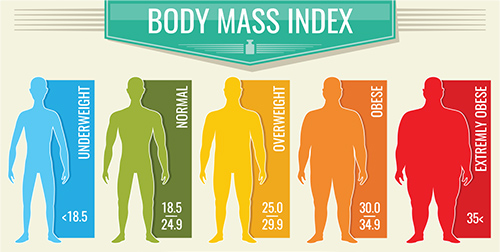

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATA**

In [ ]:
data = pd.read_csv('/content/bmi.csv')
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
data.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [ ]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [ ]:
data.dtypes

,0
Gender,object
Height,int64
Weight,int64
Index,int64


In [ ]:
data.isna().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [ ]:
data.shape

(500, 4)

In [ ]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
# Label Encoding                # For changing target values with 0's and 1's --- object datatype to integer
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Gender'] = lb.fit_transform(data['Gender'])
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [ ]:
data['Index'].value_counts()

,count
Index,
5,198
4,130
2,69
3,68
1,22
0,13


**CORRELATION**

In [ ]:
data.corr()

,Gender,Height,Weight,Index
Gender,1.000000,-0.017677,0.009523,0.028786
Height,-0.017677,1.000000,0.000446,-0.422223
Weight,0.009523,0.000446,1.000000,0.804569
Index,0.028786,-0.422223,0.804569,1.000000


<Axes: >

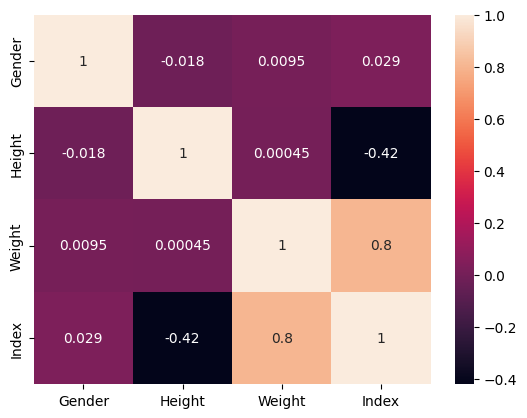

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
# pd.cut - when we need to segment and sort data values to bins and label
bins = [-1,0,1,2,3,4,5]
health = ['malnourished','underweight','fit','slightly overweight','overweight','extremely overweight']
data['Index'] = pd.cut(data['Index'],bins = bins, labels = health)
data['Index']

,Index
0,overweight
1,fit
2,overweight
3,slightly overweight
4,slightly overweight
...,...
495,extremely overweight
496,overweight
497,extremely overweight
498,extremely overweight


In [ ]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight


In [ ]:
data['Index'].value_counts()

,count
Index,
extremely overweight,198
overweight,130
fit,69
slightly overweight,68
underweight,22
malnourished,13


<Axes: xlabel='count', ylabel='Index'>

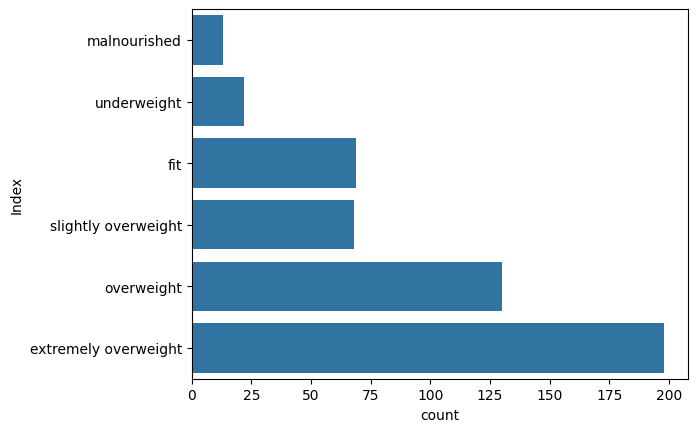

In [ ]:
sns.countplot(data['Index'])

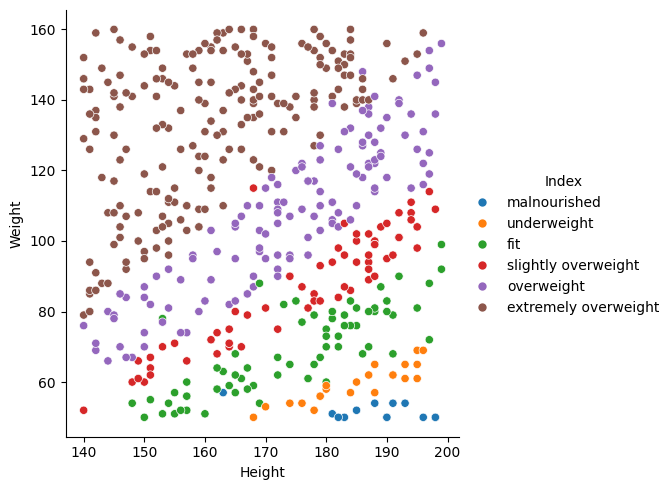

In [ ]:
sns.relplot(x='Height',y='Weight',hue='Index',data=data)

**TARGET VARIABLES**

In [ ]:
# Target variables
x = data.drop('Index',axis=1)
y = data['Index']

In [ ]:
x.head()

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61


In [ ]:
# Splitting to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state= 0)
x_train

,Gender,Height,Weight
107,1,159,154
336,0,167,153
71,1,178,117
474,0,167,79
6,1,147,92
...,...,...,...
323,1,187,140
192,1,165,105
117,0,146,104
47,1,181,111


In [ ]:
x_test

,Gender,Height,Weight
90,0,178,154
254,1,183,147
283,1,166,107
445,1,159,140
461,1,152,132
...,...,...,...
372,1,185,60
56,1,172,92
440,0,172,116
60,0,191,54


**NORMALIZATION**

In [ ]:
# Standardization / Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**MODEL CREATION**

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(accuracy_score(y_test,y_pred))

0.85


In [ ]:
pred=clf.predict(scaler.transform([[1,165,55]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pred

array(['fit'], dtype=object)